Assignment #1 - Linear Regression
Due: Feb 12 (Monday) 11:00 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
Housing_Data = pd.read_csv("C:/Users/isara/Desktop/kc_house_data.csv",parse_dates=['date'])

In [3]:
Housing_Data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
new_Housing_Data=Housing_Data.drop('id',axis=1)

In [5]:
new_Housing_Data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
new_Housing_Data.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
X=np.array(new_Housing_Data.iloc[:,[3,4,10,11,18]])
T=np.array(new_Housing_Data.iloc[:,1]).reshape(-1,1)
T.shape

(21613, 1)

In [8]:
new_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 3.3 MB


In [9]:
corr_matrix=new_Housing_Data.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [10]:
new_Housing_Data['price']=new_Housing_Data['price'].astype(np.float64)
new_Housing_Data['bathrooms']=new_Housing_Data['bathrooms'].astype(np.float64)
new_Housing_Data['grade']=new_Housing_Data['grade'].astype(np.float64)
new_Housing_Data['sqft_living']=new_Housing_Data['sqft_living'].astype(np.float64)





In [11]:
comparisions=['bedrooms','bathrooms','sqft_living','grade',
       'sqft_living15']
x_vars = new_Housing_Data[comparisions]
y_vars = new_Housing_Data["price"]

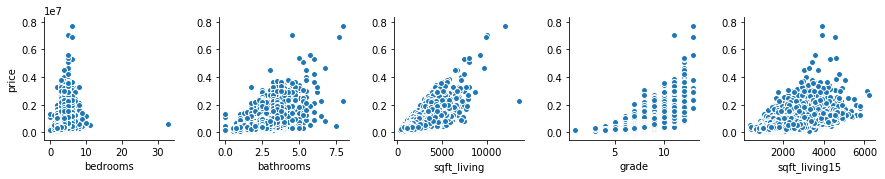

In [12]:
sns.pairplot(new_Housing_Data,x_vars=comparisions,y_vars="price")

In [13]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass

In [14]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1=LinearModel.add_ones(self,X)
#         print("X1.shape = "+str(X1.shape))
        self.w = np.linalg.lstsq(np.transpose(X1) @ X1, np.transpose(X1) @ T)[0]
        return self.w
    
    # apply the learned model to data X
    def use(self, X):
        Y = LinearModel.add_ones(self,X) @ self.w
        print(np.argmin(self.w))
        print(self.w)
        return Y

In [15]:
# LMS class 
# TODO: finish this class for LMS
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x =x.reshape(1,x.shape[0])
        t =t.reshape(1,t.shape[0])
#         print(x.shape, t.shape)
        x1=LinearModel.add_ones(self,x).T
        if(self.w is None):
            self.w=np.zeros((x1.shape[0],t.shape[0])) 
        self.w=self.w-self.alpha*(self.w.T @ x1 - t)*x1

    
    # batch training by using train_step function
    def train(self, X, T):
        N = X.shape[0]
        for k in range(N):
            self.train_step(X[k], T[k])
       
            
    # apply the current model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        Y = X1 @ self.w
#         print(np.argmin(self.w))
#         print(self.w)
        print(Y.shape)
        return Y

In [16]:
#X = np.linspace(0,10, 11).reshape((-1, 1))
#T = -2 * X + 3.2

In [17]:
#X = new_Housing_Data.loc[:, ['bedrooms','bathrooms']].as_matrix()
#T = new_Housing_Data.loc[:, ['price']].as_matrix()
#print(X)
#print(T)
#X.shape
#T.shape

In [18]:
#N = 200
#alpha = 0.0002
#X = df.loc[:N, ['User_Score','Global_Sales']].as_matrix()
#T = df.loc[:N, ['Critic_Score']].as_matrix()

#lr = LinearRegress()
#s=lr.train(X,T)
#print(s)
#Y_lr = lr.use(X)

#lms = LMS(alpha)
#s1=lms.train(X,T)
#print(s1)
#Y_lms = lms.use(X)

In [19]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

#X=np.array(new_Housing_Data.iloc[:,[3,4,10,11,18]])
#X=np.array(new_Housing_Data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]])
X=np.array(new_Housing_Data.loc[:,["sqft_living","sqft_lot15","sqft_lot","sqft_living15","sqft_basement"]])
#X=np.array(new_Housing_Data.loc[:,["sqft_lot15","sqft_lot","sqft_basement"]])
X=X/np.max(X) 
T=np.array(new_Housing_Data.iloc[:,1]).reshape(-1,1)

T=(T-np.min(T))/(np.max(T)-np.min(T))
ls = LinearRegress()
ls.train(X, T)
Y_ls=ls.use(X)
lms = LMS(0.01)
lms.train(X, T)
Y_lms=lms.use(X)
s=rmse(T,Y_ls)
s1=rmse(T,Y_lms)
df = pd.DataFrame({'Error':['Least Square','Least Mean Square'],'Values':[s,s1]})
print(df)
X.shape

2
[[ -2.30329253e-02]
 [  5.04596471e+01]
 [ -1.69910489e-01]
 [  1.76204588e-02]
 [  1.68708935e+01]
 [  7.53982013e+00]]
(21613, 1)
               Error    Values
0       Least Square  4.985323
1  Least Mean Square  7.346386


(21613, 5)

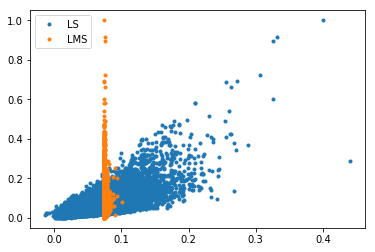

In [20]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(Y_ls,T,'.',label='LS')
ax.plot(Y_lms,T,'.',label='LMS')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [21]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

#X=np.array(new_Housing_Data.iloc[:,[3,4,10,11,18]])
#X=np.array(new_Housing_Data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]])
X=np.array(new_Housing_Data.loc[:,["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above",
"sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]
                                ])
T=np.array(new_Housing_Data.loc[:,"price"]).reshape(-1,1)
X=(X-np.mean(X))/np.std(X)
T = T/max(T)
# T=(T-np.min(T))/(np.max(T)-np.min(T))
# T = (T-np.mean(T))/np.std(T)
ls = LinearRegress()
ls.train(X, T)
Y_ls=ls.use(X)
lms = LMS(0.01)
lms.train(X, T)
Y_lms=lms.use(X)
s=rmse(T,Y_ls)
s1=rmse(T,Y_lms)
df = pd.DataFrame({'Error':['Least Square','Least Mean Square'],'Values':[s,s1]})
print(max(T), min(T))
print(Y_lms)
print(df)


16
[[  1.08708093e+03]
 [ -1.17360312e+02]
 [  1.35006452e+02]
 [  1.07199895e+02]
 [  4.21963434e-04]
 [  2.19510564e+01]
 [  1.91278952e+03]
 [  1.73484804e+02]
 [  8.65779927e+01]
 [  3.14640403e+02]
 [ -1.06605238e+02]
 [ -1.06707376e+02]
 [ -8.59763759e+00]
 [  6.50106542e-02]
 [ -1.91108317e+00]
 [  1.97777154e+03]
 [ -7.04595611e+02]
 [  7.11430605e-02]
 [ -1.25553866e-03]]
(21613, 1)
[ 1.] [ 0.00974026]
[[ 0.05636341]
 [ 0.0771182 ]
 [ 0.05837969]
 ..., 
 [ 0.0504729 ]
 [ 0.05900867]
 [ 0.05002261]]
               Error    Values
0       Least Square  3.840757
1  Least Mean Square  6.277753


### np.mean(X)
np.std(X)

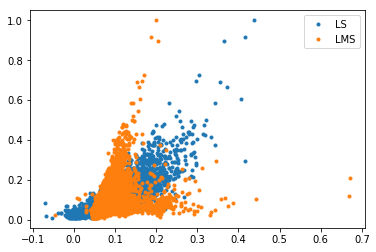

In [22]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(Y_ls,T,'.' , label='LS')
ax.plot(Y_lms,T,'.',label='LMS')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)



In [23]:
bin1=['bathrooms','sqft_living','grade','sqft_above','sqft_living15']

In [24]:
s=[]
s1=[]
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))
for i in [3,4,10,11,18]:
    X=np.array(new_Housing_Data.iloc[:,i]).reshape(-1,1)
    X=X/np.max(X)
    T=np.array(new_Housing_Data.iloc[:,1]).reshape(-1,1)
    T=(T-np.min(T))/(np.max(T)-np.min(T))
    ls = LinearRegress()
    ls.train(X, T)
    Y_ls=ls.use(X)
    lms = LMS(0.02)
    lms.train(X, T)
    Y_lms=lms.use(X)
    s.append(rmse(T,Y_ls))
    s1.append(rmse(T,Y_lms))
df = pd.DataFrame({'Features':bin1,'Least Square Error':s,'Least Mean Square Error':s1})
print(df)
    

0
[[-0.0084317 ]
 [ 0.26263766]]
(21613, 1)
0
[[-0.01555157]
 [ 0.49831385]]
(21613, 1)
0
[[-0.14833377]
 [ 0.35540306]]
(21613, 1)
0
[[-0.00197335]
 [ 0.33132232]]
(21613, 1)
0
[[-0.02069603]
 [ 0.25536818]]
(21613, 1)
        Features  Least Mean Square Error  Least Square Error
0      bathrooms                 6.040851            6.023690
1    sqft_living                 5.176944            5.040702
2          grade                 5.342473            5.270931
3     sqft_above                 5.643406            5.632807
4  sqft_living15                 5.941382            5.738738


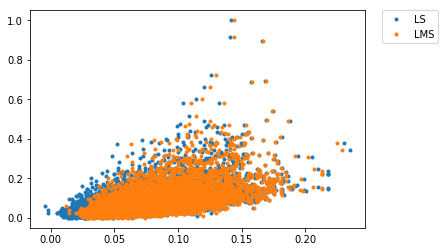

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Y_ls,T ,'.', label='LS')
ax.plot(Y_lms,T,'.', label='LMS')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [26]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... 2
[[ 3.]
 [ 3.]
 [-2.]]
passed.
---- Testing  LMS_All ... (7, 1)
passed.
---- Testing  LMS_1STEP ... (7, 1)
passed.
